<a href="https://colab.research.google.com/github/Abhisek910/AI-Flappy-Bird/blob/master/H1GCu264OR65RSNS/MonReader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background:**

Our company develops innovative Artificial Intelligence and Computer Vision solutions that revolutionize industries. Machines that can see: We pack our solutions in small yet intelligent devices that can be easily integrated to your existing data flow. Computer vision for everyone: Our devices can recognize faces, estimate age and gender, classify clothing types and colors, identify everyday objects and detect motion. Technical consultancy: We help you identify use cases of artificial intelligence and computer vision in your industry. Artificial intelligence is the technology of today, not the future.

MonReader is a new mobile document digitization experience for the blind, for researchers and for everyone else in need for fully automatic, highly fast and high-quality document scanning in bulk. It is composed of a mobile app and all the user needs to do is flip pages and everything is handled by MonReader: it detects page flips from low-resolution camera preview and takes a high-resolution picture of the document, recognizing its corners and crops it accordingly, and it dewarps the cropped document to obtain a bird's eye view, sharpens the contrast between the text and the background and finally recognizes the text with formatting kept intact, being further corrected by MonReader's ML powered redactor.


MonReader is a new mobile document digitalization experience for the blind, for researchers and for everyone else in need for fully automatic, highly fast and high-quality document scanning in bulk. It is composed of a mobile app and all the user needs to do is flip pages and everything is handled by MonReader: it detects page flips from low-resolution camera preview and takes a high-resolution picture of the document, recognizing its corners and crops it accordingly, and it dewarps the cropped document to obtain a bird's eye view, sharpens the contrast between the text and the background and finally recognizes the text with formatting kept intact, being further corrected by MonReader's ML powered redactor.


**Data Description:**

We collected page flipping video from smart phones and labelled them as flipping and not flipping.

We clipped the videos as short videos and labelled them as flipping or not flipping. The extracted frames are then saved to disk in a sequential order with the following naming structure: VideoID_FrameNumber


**[Download Data:](
https://drive.google.com/file/d/1KDQBTbo5deKGCdVV_xIujscn5ImxW4dm/view?usp=sharing)**


**Goal(s):**

Predict if the page is being flipped using a single image.


In [1]:
!nvidia-smi

Sun May 22 08:20:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf

In [3]:
!unzip "/content/drive/MyDrive/Apziva Project/images.zip"


Archive:  /content/drive/MyDrive/Apziva Project/images.zip
   creating: images/
   creating: images/testing/
   creating: images/testing/flip/
  inflating: images/testing/flip/0001_000000020.jpg  
  inflating: images/testing/flip/0002_000000012.jpg  
  inflating: images/testing/flip/0002_000000013.jpg  
  inflating: images/testing/flip/0002_000000015.jpg  
  inflating: images/testing/flip/0002_000000017.jpg  
  inflating: images/testing/flip/0003_000000005.jpg  
  inflating: images/testing/flip/0003_000000008.jpg  
  inflating: images/testing/flip/0003_000000022.jpg  
  inflating: images/testing/flip/0003_000000025.jpg  
  inflating: images/testing/flip/0004_000000006.jpg  
  inflating: images/testing/flip/0004_000000013.jpg  
  inflating: images/testing/flip/0004_000000014.jpg  
  inflating: images/testing/flip/0004_000000027.jpg  
  inflating: images/testing/flip/0005_000000003.jpg  
  inflating: images/testing/flip/0005_000000008.jpg  
  inflating: images/testing/flip/0005_000000018

In [4]:
import os
for dirpath, dirnames, filenames in os.walk("images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'images'.
There are 2 directories and 0 images in 'images/testing'.
There are 0 directories and 290 images in 'images/testing/flip'.
There are 0 directories and 307 images in 'images/testing/notflip'.
There are 2 directories and 0 images in 'images/training'.
There are 0 directories and 1162 images in 'images/training/flip'.
There are 0 directories and 1230 images in 'images/training/notflip'.


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("images/training")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['flip' 'notflip']


In [6]:
# let's visulaize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  target_folder =target_dir +target_class

  # get a random image path
  random_image =random.sample(os.listdir(target_folder),1)
  # read  in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (1920, 1080, 3)


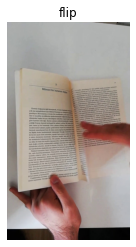

In [7]:
# View a random image from the training dataset
img =view_random_image(target_dir = "images/training/",
                       target_class = "flip")

Image shape: (1920, 1080, 3)


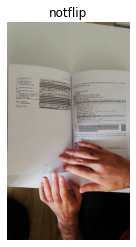

In [8]:
# View a random image from the training dataset
img =view_random_image(target_dir = "images/training/",
                       target_class = "notflip")

In [9]:
# view the image shape
img.shape # return width , height, color channels

(1920, 1080, 3)

Image shape: (1920, 1080, 3)
Image shape: (1920, 1080, 3)


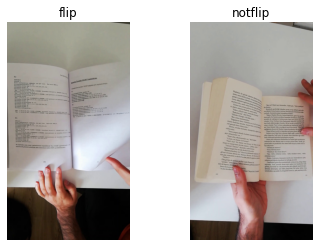

In [10]:
# visualize data
plt.figure()
plt.subplot(1,2,1)
flip_img = view_random_image("images/training/", "flip")
plt.subplot(1,2,2)
notflip =view_random_image("images/training/", "notflip")


Image shape: (1920, 1080, 3)
Image shape: (1920, 1080, 3)


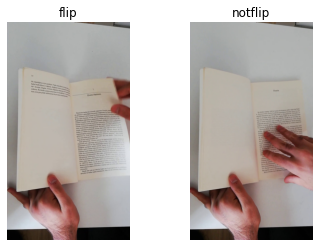

In [11]:
# visualize data
plt.figure()
plt.subplot(1,2,1)
flip_img = view_random_image("images/testing/", "flip")
plt.subplot(1,2,2)
notflip =view_random_image("images/testing/", "notflip")


Let's build a Convolutional Neuran Network to find paatterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to fin patterns in our images
* Compile our CNN
* Fit the CNN to our training data 

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data(get all of the pixel values between 0 & 1 , also called normalization/scaling )
train_datagen  =ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to our data directories
train_dir="images/training"
test_dir = "images/testing"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# build a CNN model
model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation="relu",
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding="valid"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
                                                            
])


# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1  = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data = valid_data,
                         validation_steps=len(valid_data))
                                            

Found 2392 images belonging to 2 classes.
Found 597 images belonging to 2 classes.
Epoch 1/5
75/75 [==============================] - 89s 1s/step - loss: 0.6404 - accuracy: 0.6208 - val_loss: 0.5891 - val_accuracy: 0.7152
Epoch 2/5
75/75 [==============================] - 75s 1s/step - loss: 0.3721 - accuracy: 0.8382 - val_loss: 0.3907 - val_accuracy: 0.8074
Epoch 3/5
75/75 [==============================] - 75s 1000ms/step - loss: 0.2332 - accuracy: 0.9122 - val_loss: 0.2005 - val_accuracy: 0.9213
Epoch 4/5
75/75 [==============================] - 75s 1s/step - loss: 0.1126 - accuracy: 0.9620 - val_loss: 0.1035 - val_accuracy: 0.9598
Epoch 5/5
75/75 [==============================] - 75s 1s/step - loss: 0.0638 - accuracy: 0.9766 - val_loss: 0.0699 - val_accuracy: 0.9782


In [13]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
model_1.evaluate(valid_data)

19/19 [==============================] - 15s 779ms/step - loss: 0.0699 - accuracy: 0.9782


[0.06987733393907547, 0.9782244563102722]

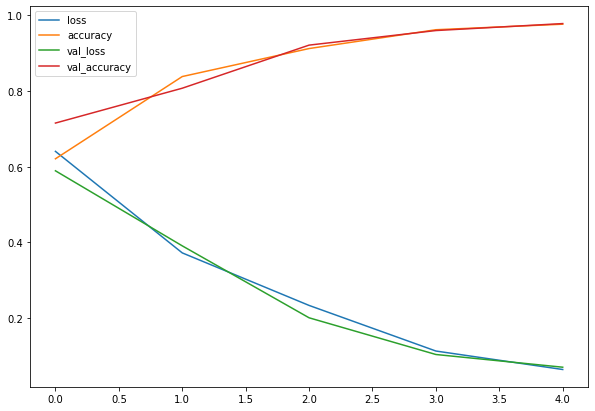

In [15]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [16]:
def plot_loss_curves(history):
  """
  Returns separte loss curves for training and validation metrics.
  """
  loss= history.history["loss"]
  val_loss =history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs =range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title('loss')
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

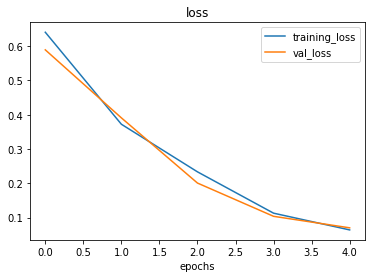

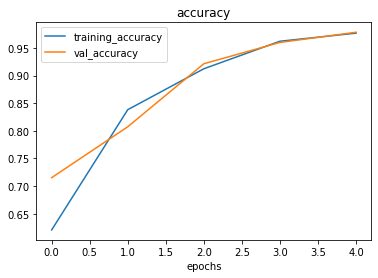

In [17]:
plot_loss_curves(history_1);

# The model we're building is from the [Tensorflor Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.86447&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [18]:
# set random seed
tf.random.seed = 42

# creata a model to replicate the Tensorflow Playground Model
model_2  = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape =(224,224,3)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
75/75 [==============================] - 75s 994ms/step - loss: 0.6934 - accuracy: 0.5121 - val_loss: 0.6930 - val_accuracy: 0.5142
Epoch 2/5
75/75 [==============================] - 73s 975ms/step - loss: 0.6930 - accuracy: 0.5142 - val_loss: 0.6929 - val_accuracy: 0.5142
Epoch 3/5
75/75 [==============================] - 73s 973ms/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6928 - val_accuracy: 0.5142
Epoch 4/5
75/75 [==============================] - 79s 1s/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6928 - val_accuracy: 0.5142
Epoch 5/5
75/75 [==============================] - 73s 975ms/step - loss: 0.6928 - accuracy: 0.5142 - val_loss: 0.6928 - val_accuracy: 0.5142


In [19]:
# get a summary of model_2
model_2.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_2.evaluate(valid_data)

19/19 [==============================] - 15s 773ms/step - loss: 0.6928 - accuracy: 0.5142


[0.6928040981292725, 0.5142378807067871]

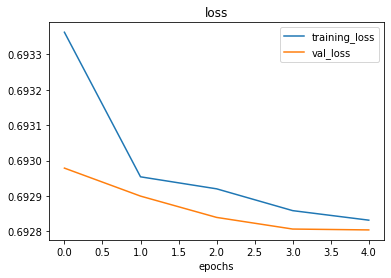

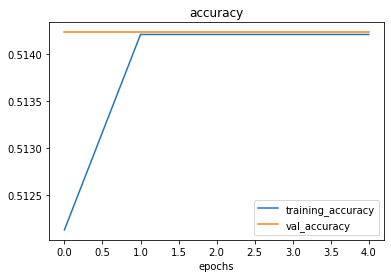

In [21]:
plot_loss_curves(history_2)

In [22]:
## Improving model_2

#set the random seed 
tf.random.set_seed(42)

# creata model
model_3  =tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

# fit the model
history_3 =model_3.fit(train_data, 
                       epochs=5, 
                       steps_per_epoch =len(train_data),
                       validation_data=valid_data,
                       validation_steps =len(valid_data) )

Epoch 1/5
75/75 [==============================] - 75s 1s/step - loss: 2.7077 - accuracy: 0.5422 - val_loss: 0.6873 - val_accuracy: 0.5829
Epoch 2/5
75/75 [==============================] - 75s 1s/step - loss: 0.7658 - accuracy: 0.6455 - val_loss: 0.5959 - val_accuracy: 0.6131
Epoch 3/5
75/75 [==============================] - 75s 999ms/step - loss: 0.5837 - accuracy: 0.7232 - val_loss: 0.3846 - val_accuracy: 0.8827
Epoch 4/5
75/75 [==============================] - 75s 998ms/step - loss: 0.5388 - accuracy: 0.7421 - val_loss: 0.4004 - val_accuracy: 0.8291
Epoch 5/5
75/75 [==============================] - 75s 996ms/step - loss: 0.3102 - accuracy: 0.8704 - val_loss: 0.2361 - val_accuracy: 0.9246


In [23]:
model_3.evaluate(valid_data)

19/19 [==============================] - 15s 780ms/step - loss: 0.2361 - accuracy: 0.9246


[0.23606154322624207, 0.9246231317520142]

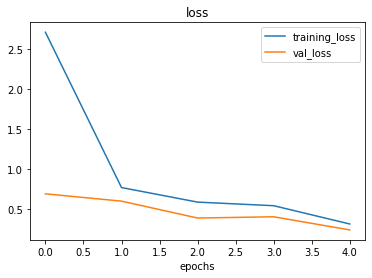

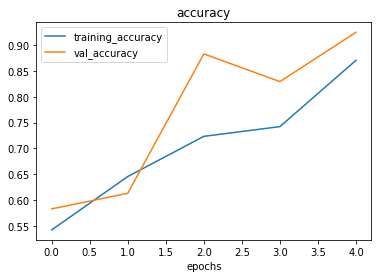

In [24]:
plot_loss_curves(history_3)

### Creating a CNN Model

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [26]:
# create the model
model_4 =Sequential([
                   Conv2D(filters=10,
                          kernel_size = (3,3),
                          strides =(1,1),
                          padding ="valid",
                          activation="relu",
                          input_shape = (224,224,3)),  # input layer
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                       Flatten(),
                     Dense(1, activation="sigmoid")    # output layer 
])

# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


# fit the model
history_4= model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
75/75 [==============================] - 81s 1s/step - loss: 0.9969 - accuracy: 0.7161 - val_loss: 0.2862 - val_accuracy: 0.8911
Epoch 2/5
75/75 [==============================] - 77s 1s/step - loss: 0.1136 - accuracy: 0.9657 - val_loss: 0.0954 - val_accuracy: 0.9648
Epoch 3/5
75/75 [==============================] - 77s 1s/step - loss: 0.0245 - accuracy: 0.9958 - val_loss: 0.1290 - val_accuracy: 0.9497
Epoch 4/5
75/75 [==============================] - 76s 1s/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.0353 - val_accuracy: 0.9849
Epoch 5/5
75/75 [==============================] - 77s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 0.9916


In [27]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_4.evaluate(valid_data)

19/19 [==============================] - 15s 790ms/step - loss: 0.0240 - accuracy: 0.9916


[0.023965349420905113, 0.9916247725486755]

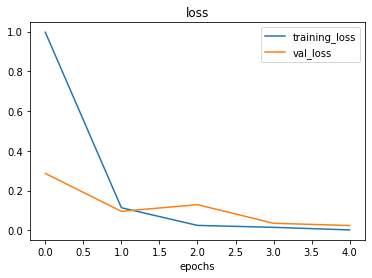

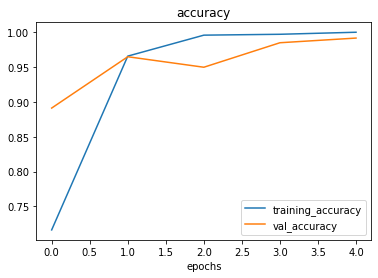

In [29]:
plot_loss_curves(history_4);

In [32]:
# create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into  a tensor and reshape it 
  to (img_shape, img_shape, color_Channel)
  """
  # read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image (get all value between 0 and 1)
  img = img/255.
  return img

In [33]:
flip = load_and_prep_image("3.jpg")
flip

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.21568628, 0.7764706 , 0.7607843 ],
        [0.21568628, 0.7764706 , 0.7607843 ],
        [0.21568628, 0.7764706 , 0.7607843 ],
        ...,
        [0.27450982, 0.7882353 , 0.7647059 ],
        [0.27450982, 0.7882353 , 0.7647059 ],
        [0.27450982, 0.7882353 , 0.7647059 ]],

       [[0.21568628, 0.7764706 , 0.7607843 ],
        [0.21568628, 0.7764706 , 0.7607843 ],
        [0.2147409 , 0.7755252 , 0.75983894],
        ...,
        [0.27450982, 0.7882353 , 0.7647059 ],
        [0.27450982, 0.7882353 , 0.7647059 ],
        [0.27450982, 0.7882353 , 0.7647059 ]],

       [[0.21568628, 0.7764706 , 0.7607843 ],
        [0.21568628, 0.7764706 , 0.7607843 ],
        [0.21176471, 0.77254903, 0.75686276],
        ...,
        [0.27450982, 0.7882353 , 0.7647059 ],
        [0.27450982, 0.7882353 , 0.7647059 ],
        [0.27450982, 0.7882353 , 0.7647059 ]],

       ...,

       [[0.05490196, 0.4627451 , 0.6784314 ],
        [0.05

In [34]:
pred=model_4.predict(tf.expand_dims(flip, axis=0))
pred

array([[0.5585045]], dtype=float32)

In [35]:
class_names

array(['flip', 'notflip'], dtype='<U7')

In [36]:

# we can index the predicted class by rounding the prediction probability and indexing it to class names
pred_class =class_names[int(tf.round(pred))]
pred_class

'notflip'

In [37]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plot the image with the predicted class as the title.
  """
  # import the target image and preprocess it
  img =load_and_prep_image(filename)

  # make a prediction
  pred= model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

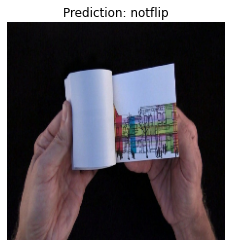

In [40]:
# test our model on a custom image
pred_and_plot(model_4, "1.jpg")

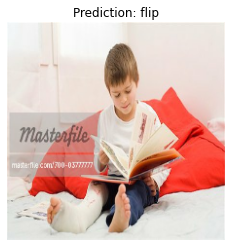

In [42]:
# test our model on a custom image
pred_and_plot(model_4, "4.jpg")

In [43]:
# save a model
model_4.save("saved_trained_model_4")

INFO:tensorflow:Assets written to: saved_trained_model_4/assets


In [44]:
# load in a trained model and evalute it
loaded_model_4 = tf.keras.models.load_model("saved_trained_model_4")
loaded_model_4.evaluate(valid_data)

19/19 [==============================] - 21s 1s/step - loss: 0.0240 - accuracy: 0.9916


[0.023965347558259964, 0.9916247725486755]

In [45]:
# compar our loaded model to our existing model
model_4.evaluate(valid_data)

19/19 [==============================] - 19s 978ms/step - loss: 0.0240 - accuracy: 0.9916


[0.023965347558259964, 0.9916247725486755]

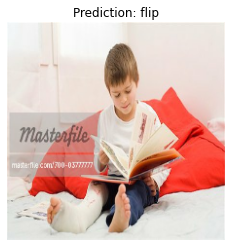

In [46]:
pred_and_plot(loaded_model_4,"4.jpg")